In [534]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [536]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [537]:
m = len(housing)
m

545

In [538]:
housing.shape

(545, 13)

In [539]:
# Split data into training and validation sets before proceeding
from sklearn.model_selection import train_test_split
np.random.seed(0)
trainSet, validSet = train_test_split(housing, train_size = 0.7, test_size = 0.3)
print(trainSet[:5])
trainSet.shape

       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
454  3143000  4500         3          1        2      yes        no       no   
392  3500000  3990         3          1        2      yes        no       no   
231  4690000  4320         3          1        1      yes        no       no   
271  4340000  1905         5          1        2       no        no      yes   
250  4515000  3510         3          1        3      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
454              no             yes        0       no      unfurnished  
392              no              no        0       no   semi-furnished  
231              no              no        0      yes   semi-furnished  
271              no              no        0       no   semi-furnished  
250              no              no        0       no   semi-furnished  


(381, 13)

In [540]:
# 
#
# Problem 1a: Training and Validation set loss
#
#
area = trainSet.values[:,1]        #First plot loss w/ training set
areaTrans = area.reshape(len(trainSet), 1)

bed = trainSet.values[:,2]
bedTrans = bed.reshape(len(trainSet), 1)

bath = trainSet.values[:,3]
bathTrans = bath.reshape(len(trainSet) , 1)

stories = trainSet.values[:,4]
storiesTrans = stories.reshape(len(trainSet) , 1)

trainX1a = np.hstack((areaTrans,bedTrans,bathTrans,storiesTrans))
print('trainX1a = ', trainX1a[: 5])
print('Length of trainX1a  =', len(trainX1a))

trainX1a =  [[4500 3 1 2]
 [3990 3 1 2]
 [4320 3 1 1]
 [1905 5 1 2]
 [3510 3 1 3]]
Length of trainX1a  = 381


In [541]:
X0 = np.ones((len(trainX1a) , 1))
X0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [542]:
trainVarsX1a = np.hstack((X0,trainX1a))
print('Training variables:')
trainVarsX1a[:5]

Training variables:


array([[1.0, 4500, 3, 1, 2],
       [1.0, 3990, 3, 1, 2],
       [1.0, 4320, 3, 1, 1],
       [1.0, 1905, 5, 1, 2],
       [1.0, 3510, 3, 1, 3]], dtype=object)

In [543]:
trainY = trainSet.values[:,0]
thetas1a = [0.0, 0.0, 0.0, 0.0, 0.0]
print('trainY = ', trainY[:5])
print('thetas1a =', thetas1a)

trainY =  [3143000 3500000 4690000 4340000 4515000]
thetas1a = [0.0, 0.0, 0.0, 0.0, 0.0]


In [544]:
# Repeat with Validation set
area = validSet.values[:,1]        
areaTrans = area.reshape(len(validSet), 1)

bed = validSet.values[:,2]
bedTrans = bed.reshape(len(validSet), 1)

bath = validSet.values[:,3]
bathTrans = bath.reshape(len(validSet) , 1)

stories = validSet.values[:,4]
storiesTrans = stories.reshape(len(validSet) , 1)

validX1a = np.hstack((areaTrans,bedTrans,bathTrans,storiesTrans))
print('validX1a = ', validX1a[: 5])
print('Length of validX1a  =', len(validX1a))

validX1a =  [[4000 3 1 2]
 [9620 3 1 1]
 [3460 4 1 2]
 [13200 2 1 1]
 [3660 4 1 2]]
Length of validX1a  = 164


In [545]:
X0 = np.ones((len(validX1a) , 1))
X0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [546]:
validVarsX1a = np.hstack((X0,validX1a))
print('Validation variables:')
validVarsX1a[:5]

Validation variables:


array([[1.0, 4000, 3, 1, 2],
       [1.0, 9620, 3, 1, 1],
       [1.0, 3460, 4, 1, 2],
       [1.0, 13200, 2, 1, 1],
       [1.0, 3660, 4, 1, 2]], dtype=object)

In [547]:
validY = validSet.values[:,0]
print('validY = ', validY[:5])

validY =  [4585000 6083000 4007500 6930000 2940000]


In [548]:
# loss function
def loss(X, Y, theta):
    
    predictions = X.dot(theta)                # h(x) = theta * X
    errors = np.subtract(predictions, Y)      # h(x) - Y
    sqrErrors = np.square(errors)             # (h(x) - Y)^2
    J = 1 / (2*m) * np.sum(sqrErrors)         # J = 1/2m * sigma( (h(x) - Y)^2 )
    return J


In [549]:
cost = loss(trainVarsX1a, trainY, thetas1a)
print('The cost for the 1a thetas is:',cost)

The cost for the 1a thetas is: 9170960481173.027


In [550]:
# gradient descent function
def gradient(X, Y, theta, alpha, iterations, vX, vY):
    
    lossHistory = np.zeros(iterations)
    lossHistoryV = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        derivative = alpha * (1/m) * X.transpose().dot(errors)
        theta = theta - derivative
        lossHistory[i] = loss(X, Y, theta)
        lossHistoryV[i] = loss(vX, vY, theta)
    
    return theta, lossHistory, lossHistoryV


In [551]:
iterations = 3000      
alpha = 0.000000001           
finalThetas1a, lossHistory1a, lossHistoryV1a = gradient(trainVarsX1a, trainY, thetas1a, alpha, iterations, validVarsX1a, validY)
print('Final thetas:', finalThetas1a)
print('Training set loss history', lossHistory1a)
print('Validation set loss history', lossHistoryV1a)

Final thetas: [0.7926904300997124 880.9382506869564 3.0855339492315714
 1.7130217121339268 2.5393783258658424]
Training set loss history [8.84315901e+12 8.52876187e+12 8.22722092e+12 ... 1.15460022e+12
 1.15460022e+12 1.15460022e+12]
Validation set loss history [3.78258453e+12 3.63577492e+12 3.49525272e+12 ... 5.28713334e+11
 5.28713333e+11 5.28713332e+11]


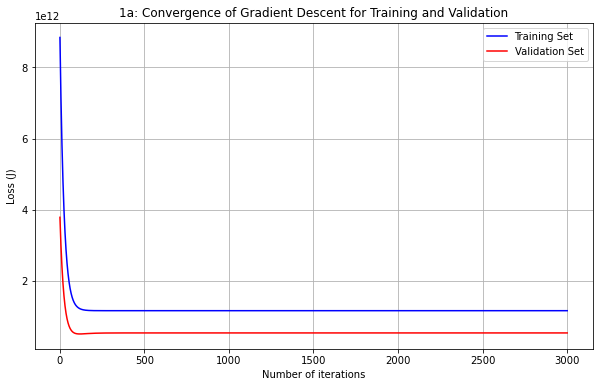

In [552]:
plt.plot(range(1, iterations + 1), lossHistory1a, color = 'blue', label = 'Training Set')
plt.plot(range(1, iterations + 1), lossHistoryV1a, color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('1a: Convergence of Gradient Descent for Training and Validation') 
plt.legend()

In [553]:
# 
#
# Problem 1b: Training and Validation set loss with binary variables
#
#
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [554]:
# Map yes and no variables to binary values
varsList = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes':1, 'no':0})

housing[varsList] = housing[varsList].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [555]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
trainSet, validSet = train_test_split(housing, train_size = 0.7, test_size = 0.3)
print(trainSet[:5])
trainSet.shape

       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
454  3143000  4500         3          1        2         1          0   
392  3500000  3990         3          1        2         1          0   
231  4690000  4320         3          1        1         1          0   
271  4340000  1905         5          1        2         0          0   
250  4515000  3510         3          1        3         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
454         0                0                1        0         0   
392         0                0                0        0         0   
231         0                0                0        0         1   
271         1                0                0        0         0   
250         0                0                0        0         0   

    furnishingstatus  
454      unfurnished  
392   semi-furnished  
231   semi-furnished  
271   semi-furnished  
250   semi-furnished  


(381, 13)

In [556]:
area = trainSet.values[:,1]        #First plot loss w/ training set
areaT = area.reshape(len(trainSet), 1)

bed = trainSet.values[:,2]
bedT = bed.reshape(len(trainSet), 1)

bath = trainSet.values[:,3]
bathT = bath.reshape(len(trainSet) , 1)

stories = trainSet.values[:,4]
storiesT = stories.reshape(len(trainSet) , 1)

mainroad = trainSet.values[:,5]
mainroadT = mainroad.reshape(len(trainSet) , 1)

guest = trainSet.values[:,6]
guestT = guest.reshape(len(trainSet) , 1)

base = trainSet.values[:,7]
baseT = base.reshape(len(trainSet) , 1)

hotwater = trainSet.values[:,8]
hotwaterT = hotwater.reshape(len(trainSet) , 1)

aircon = trainSet.values[:,9]
airconT = aircon.reshape(len(trainSet) , 1)

parking = trainSet.values[:,10]
parkingT = parking.reshape(len(trainSet) , 1)

prefarea = trainSet.values[:,11]
prefareaT = prefarea.reshape(len(trainSet) , 1)

trainX1b = np.hstack((areaT,bedT,bathT,storiesT,mainroadT,guestT,baseT,hotwaterT,airconT,parkingT,prefareaT))
print('trainX1b = ', trainX1b[: 5])
print('Length of trainX1b  =', len(trainX1b))

trainX1b =  [[4500 3 1 2 1 0 0 0 1 0 0]
 [3990 3 1 2 1 0 0 0 0 0 0]
 [4320 3 1 1 1 0 0 0 0 0 1]
 [1905 5 1 2 0 0 1 0 0 0 0]
 [3510 3 1 3 1 0 0 0 0 0 0]]
Length of trainX1b  = 381


In [557]:
X0 = np.ones((len(trainX1b) , 1))
trainVarsX1b = np.hstack((X0,trainX1b))
print('Training non-binary and binary variables:')
trainVarsX1b[:5]

Training non-binary and binary variables:


array([[1.0, 4500, 3, 1, 2, 1, 0, 0, 0, 1, 0, 0],
       [1.0, 3990, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0],
       [1.0, 4320, 3, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [1.0, 1905, 5, 1, 2, 0, 0, 1, 0, 0, 0, 0],
       [1.0, 3510, 3, 1, 3, 1, 0, 0, 0, 0, 0, 0]], dtype=object)

In [558]:
trainYb = trainSet.values[:,0]
thetas1b = np.zeros(12)
print('trainYb = ', trainYb[:5])
print('thetas1b =', thetas1b)

trainYb =  [3143000 3500000 4690000 4340000 4515000]
thetas1b = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [559]:
print(validSet[:5])

       price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
239  4585000   4000         3          1        2         1          0   
113  6083000   9620         3          1        1         1          0   
325  4007500   3460         4          1        2         1          0   
66   6930000  13200         2          1        1         1          0   
479  2940000   3660         4          1        2         0          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
239         0                0                0        1         0   
113         1                0                0        2         1   
325         0                0                1        0         0   
66          1                1                0        1         0   
479         0                0                0        0         0   

    furnishingstatus  
239        furnished  
113        furnished  
325   semi-furnished  
66         furnished  
479      unfurnishe

In [560]:
area = validSet.values[:,1]        #Loss w/ validation set
areaT = area.reshape(len(validSet), 1)

bed = validSet.values[:,2]
bedT = bed.reshape(len(validSet), 1)

bath = validSet.values[:,3]
bathT = bath.reshape(len(validSet) , 1)

stories = validSet.values[:,4]
storiesT = stories.reshape(len(validSet) , 1)

mainroad = validSet.values[:,5]
mainroadT = mainroad.reshape(len(validSet) , 1)

guest = validSet.values[:,6]
guestT = guest.reshape(len(validSet) , 1)

base = validSet.values[:,7]
baseT = base.reshape(len(validSet) , 1)

hotwater = validSet.values[:,8]
hotwaterT = hotwater.reshape(len(validSet) , 1)

aircon = validSet.values[:,9]
airconT = aircon.reshape(len(validSet) , 1)

parking = validSet.values[:,10]
parkingT = parking.reshape(len(validSet) , 1)

prefarea = validSet.values[:,11]
prefareaT = prefarea.reshape(len(validSet) , 1)

validX1b = np.hstack((areaT,bedT,bathT,storiesT,mainroadT,guestT,baseT,hotwaterT,airconT,parkingT,prefareaT))
print('validX1b = ', validX1b[: 5])
print('Length of validX1b  =', len(validX1b))

validX1b =  [[4000 3 1 2 1 0 0 0 0 1 0]
 [9620 3 1 1 1 0 1 0 0 2 1]
 [3460 4 1 2 1 0 0 0 1 0 0]
 [13200 2 1 1 1 0 1 1 0 1 0]
 [3660 4 1 2 0 0 0 0 0 0 0]]
Length of validX1b  = 164


In [561]:
X0 = np.ones((len(validX1b) , 1))
validVarsX1b = np.hstack((X0,validX1b))
print('Validation non-binary and binary variables:')
validVarsX1b[:5]

Validation non-binary and binary variables:


array([[1.0, 4000, 3, 1, 2, 1, 0, 0, 0, 0, 1, 0],
       [1.0, 9620, 3, 1, 1, 1, 0, 1, 0, 0, 2, 1],
       [1.0, 3460, 4, 1, 2, 1, 0, 0, 0, 1, 0, 0],
       [1.0, 13200, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0],
       [1.0, 3660, 4, 1, 2, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [562]:
validYb = validSet.values[:,0]
print('validYb = ', validYb[:5])

validYb =  [4585000 6083000 4007500 6930000 2940000]


In [563]:
cost = loss(trainVarsX1b, trainYb, thetas1b)
print('The cost for the 1b thetas is:',cost)

The cost for the 1b thetas is: 9170960481173.027


In [564]:
iterations = 3000      
alpha = 0.000000001           
finalThetas1b, lossHistory1b, lossHistoryV1b = gradient(trainVarsX1b, trainYb, thetas1b, alpha, iterations, validVarsX1b, validYb)
print('Final thetas:', finalThetas1b)
print('Training set loss history', lossHistory1b)
print('Validation set loss history', lossHistoryV1b)

Final thetas: [0.7926902857786174 880.937939893957 3.085533414620161 1.7130214285594407
 2.5393780380562063 0.7022547802994992 0.3380710711556625
 0.5881271704669561 0.16603563866531265 0.6672128435122959
 0.6851441809148401 0.35667326793558424]
Training set loss history [8.84315899e+12 8.52876183e+12 8.22722086e+12 ... 1.15459964e+12
 1.15459964e+12 1.15459964e+12]
Validation set loss history [3.78258452e+12 3.63577490e+12 3.49525269e+12 ... 5.28713004e+11
 5.28713003e+11 5.28713002e+11]


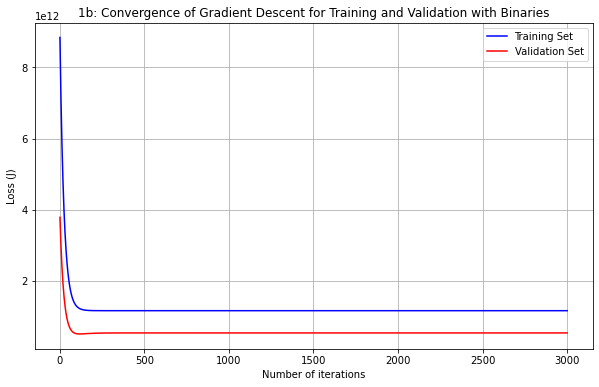

In [565]:
plt.plot(range(1, iterations + 1), lossHistory1b, color = 'blue', label = 'Training Set')
plt.plot(range(1, iterations + 1), lossHistoryV1b, color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('1b: Convergence of Gradient Descent for Training and Validation with Binaries') 
plt.legend()

In [566]:
#
#
# Problem 2a: Training and Validation Loss w/ Standardization and Normalization
#
#
data2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
trainTable2a = trainSet[data2a]
validTable2a = validSet[data2a]
trainTable2a.head()

,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


In [567]:
# Standardization first
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
standard = StandardScaler()
trainTable2a[data2a] = standard.fit_transform(trainTable2a[data2a])  #standardize all training data
print('Standardized training table:')
trainTable2a.head(5)

Standardized training table:


,area,bedrooms,bathrooms,stories,parking,price
454,-0.286366,0.073764,-0.58123,0.207401,-0.82296,-0.868394
392,-0.544762,0.073764,-0.58123,0.207401,-0.82296,-0.677628
231,-0.377564,0.073764,-0.58123,-0.937813,-0.82296,-0.041744
271,-1.601145,2.884176,-0.58123,0.207401,-0.82296,-0.228768
250,-0.787958,0.073764,-0.58123,1.352614,-0.82296,-0.135256


In [568]:
validTable2a[data2a] = standard.fit_transform(validTable2a[data2a])
print('Standardized validation table:')
validTable2a.head(5)

Standardized validation table:


,area,bedrooms,bathrooms,stories,parking,price
239,-0.528409,-0.007694,-0.550215,0.265241,0.442615,-0.095841
113,1.673306,-0.007694,-0.550215,-0.910424,1.652428,0.708470
325,-0.739961,1.254180,-0.550215,0.265241,-0.767199,-0.405914
66,3.075822,-1.269569,-0.550215,-0.910424,0.442615,1.163244
479,-0.661608,1.254180,-0.550215,0.265241,-0.767199,-0.979079


In [569]:
Y = trainTable2a.pop('price')
Y2aStdTrain = Y.values
print('Standardized training Y:')
Y2aStdTrain[:5]

Standardized training Y:


array([-0.86839366, -0.67762826, -0.04174357, -0.22876848, -0.13525602])

In [570]:
Y = validTable2a.pop('price')
Y2aStdValid = Y.values
print('Standardized validation Y:')
Y2aStdValid[:5]

Standardized validation Y:


array([-0.09584075,  0.70846983, -0.40591375,  1.16324356, -0.97907899])

In [571]:
areaStdTrain = trainTable2a.values[:,0]
areaT = areaStdTrain.reshape(len(trainTable2a),1)

bedStdTrain = trainTable2a.values[:,1]
bedT = bedStdTrain.reshape(len(trainTable2a),1)

bathStdTrain = trainTable2a.values[:,2]
bathT = bathStdTrain.reshape(len(trainTable2a),1)

storStdTrain = trainTable2a.values[:,3]
storT = storStdTrain.reshape(len(trainTable2a),1)

parkStdTrain = trainTable2a.values[:,4]
parkT = parkStdTrain.reshape(len(trainTable2a),1)

X0 = np.ones((len(trainTable2a) , 1))
varsStdTrain = np.hstack((X0,areaT,bedT,bathT,storT,parkT))
print('Standardized training X variables:')
varsStdTrain[:5]

Standardized training X variables:


array([[ 1.        , -0.28636589,  0.07376409, -0.58122996,  0.20740088,
        -0.82296013],
       [ 1.        , -0.54476182,  0.07376409, -0.58122996,  0.20740088,
        -0.82296013],
       [ 1.        , -0.37756445,  0.07376409, -0.58122996, -0.93781267,
        -0.82296013],
       [ 1.        , -1.60114518,  2.88417578, -0.58122996,  0.20740088,
        -0.82296013],
       [ 1.        , -0.78795799,  0.07376409, -0.58122996,  1.35261443,
        -0.82296013]])

In [572]:
areaStdValid = validTable2a.values[:,0]
areaT = areaStdValid.reshape(len(validTable2a),1)

bedStdValid = validTable2a.values[:,1]
bedT = bedStdValid.reshape(len(validTable2a),1)

bathStdValid = validTable2a.values[:,2]
bathT = bathStdValid.reshape(len(validTable2a),1)

storStdValid = validTable2a.values[:,3]
storT = storStdValid.reshape(len(validTable2a),1)

parkStdValid = validTable2a.values[:,4]
parkT = parkStdValid.reshape(len(validTable2a),1)

X0 = np.ones((len(validTable2a) , 1))
varsStdValid = np.hstack((X0,areaT,bedT,bathT,storT,parkT))
print('Standardized validation X variables:')
varsStdValid[:5]

Standardized validation X variables:


array([[ 1.        , -0.52840866, -0.00769436, -0.55021459,  0.26524149,
         0.44261462],
       [ 1.        ,  1.67330604, -0.00769436, -0.55021459, -0.91042351,
         1.65242793],
       [ 1.        , -0.73996132,  1.25418015, -0.55021459,  0.26524149,
        -0.76719868],
       [ 1.        ,  3.07582182, -1.26956887, -0.55021459, -0.91042351,
         0.44261462],
       [ 1.        , -0.66160849,  1.25418015, -0.55021459,  0.26524149,
        -0.76719868]])

In [573]:
thetas2a = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
iterations = 2000      
alpha = 0.1           
finalThetas2a, lossHistory2a, lossHistoryV2a = gradient(varsStdTrain, Y2aStdTrain, thetas2a, alpha, iterations, varsStdValid, Y2aStdValid)
print('Final thetas:', finalThetas2a)
print('Training set loss history', lossHistory2a)
print('Validation set loss history', lossHistoryV2a)

Final thetas: [1.85295204e-16 3.83653304e-01 1.04343457e-01 2.98541735e-01
 2.34542828e-01 1.49757135e-01]
Training set loss history [0.30701817 0.27459435 0.24983778 ... 0.16481492 0.16481492 0.16481492]
Validation set loss history [0.12934893 0.11314751 0.10068501 ... 0.05391235 0.05391235 0.05391235]


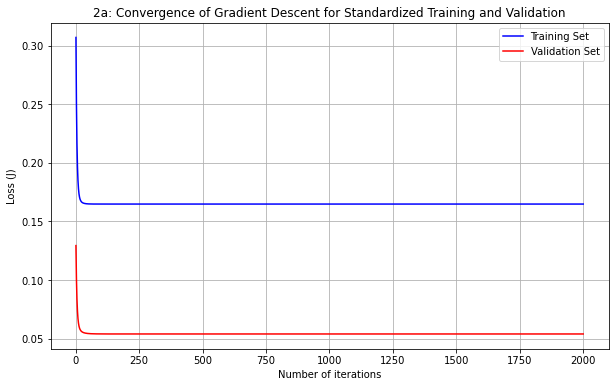

In [574]:
plt.plot(range(1, iterations + 1), lossHistory2a, color = 'blue', label = 'Training Set')
plt.plot(range(1, iterations + 1), lossHistoryV2a, color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('2a: Convergence of Gradient Descent for Standardized Training and Validation') 
plt.legend()

In [575]:
# Reset tables due to popping earlier
trainTable2a = trainSet[data2a]
validTable2a = validSet[data2a]
trainTable2a.head()

,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


In [576]:
# Now MinMax Normalization
minMax = MinMaxScaler()
trainTable2a[data2a] = minMax.fit_transform(trainTable2a[data2a])  #normalize all training data
print('Normalized training table:')
trainTable2a.head(5)

Normalized training table:


,area,bedrooms,bathrooms,stories,parking,price
454,0.193548,0.5,0.0,0.333333,0.0,0.120606
392,0.156495,0.5,0.0,0.333333,0.0,0.151515
231,0.180471,0.5,0.0,0.000000,0.0,0.254545
271,0.005013,1.0,0.0,0.333333,0.0,0.224242
250,0.121622,0.5,0.0,0.666667,0.0,0.239394


In [577]:
validTable2a[data2a] = minMax.fit_transform(validTable2a[data2a])
print('Normalized validation table:')
validTable2a.head(5)

Normalized validation table:


,area,bedrooms,bathrooms,stories,parking,price
239,0.161512,0.4,0.0,0.333333,0.333333,0.270000
113,0.547766,0.4,0.0,0.000000,0.666667,0.412667
325,0.124399,0.6,0.0,0.333333,0.000000,0.215000
66,0.793814,0.2,0.0,0.000000,0.333333,0.493333
479,0.138144,0.6,0.0,0.333333,0.000000,0.113333


In [578]:
Y = trainTable2a.pop('price')
Y2aMinTrain = Y.values
print('Normalized training Y:')
Y2aMinTrain[:5]

Normalized training Y:


array([0.12060606, 0.15151515, 0.25454545, 0.22424242, 0.23939394])

In [579]:
Y = validTable2a.pop('price')
Y2aMinValid = Y.values
print('Normalized validation Y:')
Y2aMinValid[:5]

Normalized validation Y:


array([0.27      , 0.41266667, 0.215     , 0.49333333, 0.11333333])

In [580]:
areaMinTrain = trainTable2a.values[:,0]
areaT = areaMinTrain.reshape(len(trainTable2a),1)

bedMinTrain = trainTable2a.values[:,1]
bedT = bedMinTrain.reshape(len(trainTable2a),1)

bathMinTrain = trainTable2a.values[:,2]
bathT = bathMinTrain.reshape(len(trainTable2a),1)

storMinTrain = trainTable2a.values[:,3]
storT = storMinTrain.reshape(len(trainTable2a),1)

parkMinTrain = trainTable2a.values[:,4]
parkT = parkMinTrain.reshape(len(trainTable2a),1)

X0 = np.ones((len(trainTable2a) , 1))
varsMinTrain = np.hstack((X0,areaT,bedT,bathT,storT,parkT))
print('Normalized training X variables:')
varsMinTrain[:5]

Normalized training X variables:


array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.18047079, 0.5       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.00501308, 1.        , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.12162162, 0.5       , 0.        , 0.66666667,
        0.        ]])

In [581]:
areaMinValid = validTable2a.values[:,0]
areaT = areaMinValid.reshape(len(validTable2a),1)

bedMinValid = validTable2a.values[:,1]
bedT = bedMinValid.reshape(len(validTable2a),1)

bathMinValid = validTable2a.values[:,2]
bathT = bathMinValid.reshape(len(validTable2a),1)

storMinValid = validTable2a.values[:,3]
storT = storMinValid.reshape(len(validTable2a),1)

parkMinValid = validTable2a.values[:,4]
parkT = parkMinValid.reshape(len(validTable2a),1)

X0 = np.ones((len(validTable2a) , 1))
varsMinValid = np.hstack((X0,areaT,bedT,bathT,storT,parkT))
print('Normalized validation X variables:')
varsMinValid[:5]

Normalized validation X variables:


array([[1.        , 0.16151203, 0.4       , 0.        , 0.33333333,
        0.33333333],
       [1.        , 0.54776632, 0.4       , 0.        , 0.        ,
        0.66666667],
       [1.        , 0.12439863, 0.6       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.79381443, 0.2       , 0.        , 0.        ,
        0.33333333],
       [1.        , 0.13814433, 0.6       , 0.        , 0.33333333,
        0.        ]])

In [582]:
thetas2a = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
iterations = 2000      
alpha = 0.1           
finalThetas2a, lossHistory2a, lossHistoryV2a = gradient(varsMinTrain, Y2aMinTrain, thetas2a, alpha, iterations, varsMinValid, Y2aMinValid)
print('Final thetas:', finalThetas2a)
print('Training set loss history', lossHistory2a)
print('Validation set loss history', lossHistoryV2a)

Final thetas: [0.03665816 0.39706852 0.09331946 0.20069866 0.13258648 0.09091089]
Training set loss history [0.02793021 0.02380952 0.02048825 ... 0.00433523 0.00433521 0.00433519]
Validation set loss history [0.0147756  0.01285125 0.01127367 ... 0.00199323 0.00199321 0.00199319]


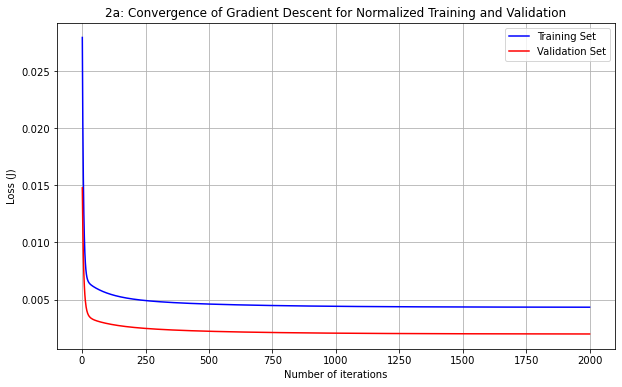

In [583]:
plt.plot(range(1, iterations + 1), lossHistory2a, color = 'blue', label = 'Training Set')
plt.plot(range(1, iterations + 1), lossHistoryV2a, color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('2a: Convergence of Gradient Descent for Normalized Training and Validation') 
plt.legend()

In [606]:
#
#
# Problem 2b: Standardization and Normalization with binary variables included
#
#
trainSet.head() # already converted binaries

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
454,3143000,4500,3,1,2,1,0,0,0,1,0,0,unfurnished
392,3500000,3990,3,1,2,1,0,0,0,0,0,0,semi-furnished
231,4690000,4320,3,1,1,1,0,0,0,0,0,1,semi-furnished
271,4340000,1905,5,1,2,0,0,1,0,0,0,0,semi-furnished
250,4515000,3510,3,1,3,1,0,0,0,0,0,0,semi-furnished


In [607]:
# First get the total training and validation tables
data2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
trainTable2b = trainSet[data2b]
validTable2b = validSet[data2b]

trainTable2b.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,4500,3,1,2,1,0,0,0,1,0,0,3143000
392,3990,3,1,2,1,0,0,0,0,0,0,3500000
231,4320,3,1,1,1,0,0,0,0,0,1,4690000
271,1905,5,1,2,0,0,1,0,0,0,0,4340000
250,3510,3,1,3,1,0,0,0,0,0,0,4515000


In [608]:
# Standardize all training data
trainTable2b[data2b] = standard.fit_transform(trainTable2b[data2b])  
print('Standardized training table:')
trainTable2b.head(5)

Standardized training table:


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,-0.286366,0.073764,-0.58123,0.207401,0.393123,-0.457738,-0.711287,-0.216109,1.422607,-0.82296,-0.564215,-0.868394
392,-0.544762,0.073764,-0.58123,0.207401,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.82296,-0.564215,-0.677628
231,-0.377564,0.073764,-0.58123,-0.937813,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.82296,1.772373,-0.041744
271,-1.601145,2.884176,-0.58123,0.207401,-2.543735,-0.457738,1.405903,-0.216109,-0.702935,-0.82296,-0.564215,-0.228768
250,-0.787958,0.073764,-0.58123,1.352614,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.82296,-0.564215,-0.135256


In [609]:
# Standardize all validation data
validTable2b[data2b] = standard.fit_transform(validTable2b[data2b])
print('Standardized validation table:')
validTable2b.head(5)

Standardized validation table:


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
239,-0.528409,-0.007694,-0.550215,0.265241,0.434057,-0.482786,-0.789786,-0.226455,-0.624364,0.442615,-0.530330,-0.095841
113,1.673306,-0.007694,-0.550215,-0.910424,0.434057,-0.482786,1.266165,-0.226455,-0.624364,1.652428,1.885618,0.708470
325,-0.739961,1.254180,-0.550215,0.265241,0.434057,-0.482786,-0.789786,-0.226455,1.601630,-0.767199,-0.530330,-0.405914
66,3.075822,-1.269569,-0.550215,-0.910424,0.434057,-0.482786,1.266165,4.415880,-0.624364,0.442615,-0.530330,1.163244
479,-0.661608,1.254180,-0.550215,0.265241,-2.303843,-0.482786,-0.789786,-0.226455,-0.624364,-0.767199,-0.530330,-0.979079


In [610]:
# Extract Y values from the standardized training data
Y = trainTable2b.pop('price')
trainStdY = Y.values
print('Standardized training Y:')
trainStdY[:5]

Standardized training Y:


array([-0.86839366, -0.67762826, -0.04174357, -0.22876848, -0.13525602])

In [611]:
# Extract Y values from the standardized validation data
Y = validTable2b.pop('price')
validStdY = Y.values
print('Standardized validation Y:')
validStdY[:5]

Standardized validation Y:


array([-0.09584075,  0.70846983, -0.40591375,  1.16324356, -0.97907899])

In [612]:
# Assemble X variables for training set 
area = trainTable2b.values[:,0]        
areaT = area.reshape(len(trainTable2b), 1)

bed = trainTable2b.values[:,1]        
bedT = bed.reshape(len(trainTable2b), 1)

bath = trainTable2b.values[:,2]        
bathT = bath.reshape(len(trainTable2b), 1)

stor = trainTable2b.values[:,3]        
storT = stor.reshape(len(trainTable2b), 1)

mainroad = trainTable2b.values[:,4]        
mainroadT = mainroad.reshape(len(trainTable2b), 1)

guest = trainTable2b.values[:,5]        
guestT = guest.reshape(len(trainTable2b), 1)

basement = trainTable2b.values[:,6]        
basementT = basement.reshape(len(trainTable2b), 1)

hotwater = trainTable2b.values[:,7]        
hotwaterT = hotwater.reshape(len(trainTable2b), 1)

aircon = trainTable2b.values[:,8]        
airconT = aircon.reshape(len(trainTable2b), 1)

park = trainTable2b.values[:,9]        
parkT = park.reshape(len(trainTable2b), 1)

prefarea = trainTable2b.values[:,10]        
prefareaT = prefarea.reshape(len(trainTable2b), 1)

X0 = np.ones((len(trainTable2b) , 1))
varsStdTrain = np.hstack((X0,areaT,bedT,bathT,storT,mainroadT,guestT,basementT,hotwaterT,airconT,parkT,prefareaT))
print('Standardized training X variables (binary included):')
varsStdTrain[:5]

Standardized training X variables (binary included):


array([[ 1.        , -0.28636589,  0.07376409, -0.58122996,  0.20740088,
         0.3931227 , -0.45773771, -0.71128676, -0.21610946,  1.42260659,
        -0.82296013, -0.56421547],
       [ 1.        , -0.54476182,  0.07376409, -0.58122996,  0.20740088,
         0.3931227 , -0.45773771, -0.71128676, -0.21610946, -0.70293502,
        -0.82296013, -0.56421547],
       [ 1.        , -0.37756445,  0.07376409, -0.58122996, -0.93781267,
         0.3931227 , -0.45773771, -0.71128676, -0.21610946, -0.70293502,
        -0.82296013,  1.77237252],
       [ 1.        , -1.60114518,  2.88417578, -0.58122996,  0.20740088,
        -2.5437351 , -0.45773771,  1.40590273, -0.21610946, -0.70293502,
        -0.82296013, -0.56421547],
       [ 1.        , -0.78795799,  0.07376409, -0.58122996,  1.35261443,
         0.3931227 , -0.45773771, -0.71128676, -0.21610946, -0.70293502,
        -0.82296013, -0.56421547]])

In [613]:
# Assemble X variables for validation set 
area = validTable2b.values[:,0]        
areaT = area.reshape(len(validTable2b), 1)

bed = validTable2b.values[:,1]        
bedT = bed.reshape(len(validTable2b), 1)

bath = validTable2b.values[:,2]        
bathT = bath.reshape(len(validTable2b), 1)

stor = validTable2b.values[:,3]        
storT = stor.reshape(len(validTable2b), 1)

mainroad = validTable2b.values[:,4]        
mainroadT = mainroad.reshape(len(validTable2b), 1)

guest = validTable2b.values[:,5]        
guestT = guest.reshape(len(validTable2b), 1)

basement = validTable2b.values[:,6]        
basementT = basement.reshape(len(validTable2b), 1)

hotwater = validTable2b.values[:,7]        
hotwaterT = hotwater.reshape(len(validTable2b), 1)

aircon = validTable2b.values[:,8]        
airconT = aircon.reshape(len(validTable2b), 1)

park = validTable2b.values[:,9]        
parkT = park.reshape(len(validTable2b), 1)

prefarea = validTable2b.values[:,10]        
prefareaT = prefarea.reshape(len(validTable2b), 1)

X0 = np.ones((len(validTable2b) , 1))
varsStdValid = np.hstack((X0,areaT,bedT,bathT,storT,mainroadT,guestT,basementT,hotwaterT,airconT,parkT,prefareaT))
print('Standardized validation X variables (binary included):')
varsStdValid[:5]

Standardized validation X variables (binary included):


array([[ 1.        , -0.52840866, -0.00769436, -0.55021459,  0.26524149,
         0.43405737, -0.4827864 , -0.78978629, -0.22645541, -0.62436408,
         0.44261462, -0.53033009],
       [ 1.        ,  1.67330604, -0.00769436, -0.55021459, -0.91042351,
         0.43405737, -0.4827864 ,  1.26616531, -0.22645541, -0.62436408,
         1.65242793,  1.88561808],
       [ 1.        , -0.73996132,  1.25418015, -0.55021459,  0.26524149,
         0.43405737, -0.4827864 , -0.78978629, -0.22645541,  1.6016296 ,
        -0.76719868, -0.53033009],
       [ 1.        ,  3.07582182, -1.26956887, -0.55021459, -0.91042351,
         0.43405737, -0.4827864 ,  1.26616531,  4.41588043, -0.62436408,
         0.44261462, -0.53033009],
       [ 1.        , -0.66160849,  1.25418015, -0.55021459,  0.26524149,
        -2.30384294, -0.4827864 , -0.78978629, -0.22645541, -0.62436408,
        -0.76719868, -0.53033009]])

In [615]:
thetas2b = np.zeros(12)
iterations = 3000      
alpha = 0.1           
finalThetas2b, lossHistory2b, lossHistoryV2b = gradient(varsStdTrain, trainStdY, thetas2b, alpha, iterations, varsStdValid, validStdY)
print('Final thetas:', finalThetas2b)
print('Training set loss history', lossHistory2b)
print('Validation set loss history', lossHistoryV2b)

Final thetas: [1.62479612e-16 2.69430270e-01 5.88474875e-02 2.48153203e-01
 1.99265962e-01 9.20205597e-02 8.25960172e-02 9.41683856e-02
 1.40206929e-01 2.32616682e-01 1.16157210e-01 1.62960286e-01]
Training set loss history [0.28371136 0.23745809 0.2049124  ... 0.12241216 0.12241216 0.12241216]
Validation set loss history [0.12026153 0.09882645 0.08356541 ... 0.04294572 0.04294572 0.04294572]


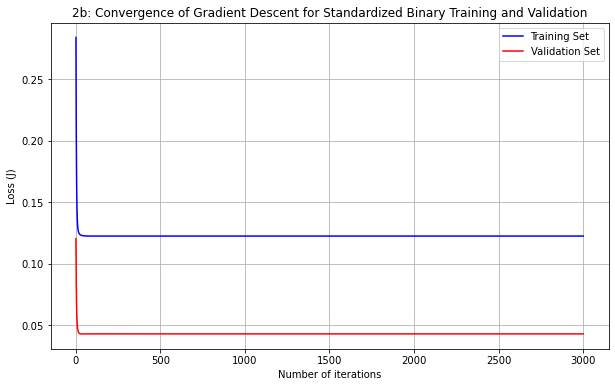

In [616]:
plt.plot(range(1, iterations + 1), lossHistory2b, color = 'blue', label = 'Training Set')
plt.plot(range(1, iterations + 1), lossHistoryV2b, color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('2b: Convergence of Gradient Descent for Standardized Binary Training and Validation') 
plt.legend()

In [617]:
# Reset the tables due to popping
trainTable2b = trainSet[data2b]
validTable2b = validSet[data2b]

trainTable2b.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,4500,3,1,2,1,0,0,0,1,0,0,3143000
392,3990,3,1,2,1,0,0,0,0,0,0,3500000
231,4320,3,1,1,1,0,0,0,0,0,1,4690000
271,1905,5,1,2,0,0,1,0,0,0,0,4340000
250,3510,3,1,3,1,0,0,0,0,0,0,4515000


In [618]:
# Normalize all training data
trainTable2b[data2b] = minMax.fit_transform(trainTable2b[data2b])  
print('Normalized training table:')
trainTable2b.head(5)

Normalized training table:


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,0.193548,0.5,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.120606
392,0.156495,0.5,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151515
231,0.180471,0.5,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.254545
271,0.005013,1.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.224242
250,0.121622,0.5,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239394


In [619]:
# Standardize all validation data
validTable2b[data2b] = minMax.fit_transform(validTable2b[data2b])
print('Normalized validation table:')
validTable2b.head(5)

Normalized validation table:


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
239,0.161512,0.4,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.270000
113,0.547766,0.4,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.412667
325,0.124399,0.6,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.215000
66,0.793814,0.2,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.333333,0.0,0.493333
479,0.138144,0.6,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.113333


In [620]:
# Extract Y values from the normalized training data
Y = trainTable2b.pop('price')
trainMinY = Y.values
print('Normalized training Y:')
trainMinY[:5]

Normalized training Y:


array([0.12060606, 0.15151515, 0.25454545, 0.22424242, 0.23939394])

In [622]:
# Extract Y values from the normalized validation data
Y = validTable2b.pop('price')
validMinY = Y.values
print('Normalized training Y:')
validMinY[:5]

Normalized training Y:


array([0.27      , 0.41266667, 0.215     , 0.49333333, 0.11333333])

In [623]:
# Assemble X variables for training set 
area = trainTable2b.values[:,0]        
areaT = area.reshape(len(trainTable2b), 1)

bed = trainTable2b.values[:,1]        
bedT = bed.reshape(len(trainTable2b), 1)

bath = trainTable2b.values[:,2]        
bathT = bath.reshape(len(trainTable2b), 1)

stor = trainTable2b.values[:,3]        
storT = stor.reshape(len(trainTable2b), 1)

mainroad = trainTable2b.values[:,4]        
mainroadT = mainroad.reshape(len(trainTable2b), 1)

guest = trainTable2b.values[:,5]        
guestT = guest.reshape(len(trainTable2b), 1)

basement = trainTable2b.values[:,6]        
basementT = basement.reshape(len(trainTable2b), 1)

hotwater = trainTable2b.values[:,7]        
hotwaterT = hotwater.reshape(len(trainTable2b), 1)

aircon = trainTable2b.values[:,8]        
airconT = aircon.reshape(len(trainTable2b), 1)

park = trainTable2b.values[:,9]        
parkT = park.reshape(len(trainTable2b), 1)

prefarea = trainTable2b.values[:,10]        
prefareaT = prefarea.reshape(len(trainTable2b), 1)

X0 = np.ones((len(trainTable2b) , 1))
varsMinTrain = np.hstack((X0,areaT,bedT,bathT,storT,mainroadT,guestT,basementT,hotwaterT,airconT,parkT,prefareaT))
print('Normalized training X variables (binary included):')
varsMinTrain[:5]

Normalized training X variables (binary included):


array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.18047079, 0.5       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.00501308, 1.        , 0.        , 0.33333333,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.12162162, 0.5       , 0.        , 0.66666667,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [624]:
# Assemble X variables for validation set 
area = validTable2b.values[:,0]        
areaT = area.reshape(len(validTable2b), 1)

bed = validTable2b.values[:,1]        
bedT = bed.reshape(len(validTable2b), 1)

bath = validTable2b.values[:,2]        
bathT = bath.reshape(len(validTable2b), 1)

stor = validTable2b.values[:,3]        
storT = stor.reshape(len(validTable2b), 1)

mainroad = validTable2b.values[:,4]        
mainroadT = mainroad.reshape(len(validTable2b), 1)

guest = validTable2b.values[:,5]        
guestT = guest.reshape(len(validTable2b), 1)

basement = validTable2b.values[:,6]        
basementT = basement.reshape(len(validTable2b), 1)

hotwater = validTable2b.values[:,7]        
hotwaterT = hotwater.reshape(len(validTable2b), 1)

aircon = validTable2b.values[:,8]        
airconT = aircon.reshape(len(validTable2b), 1)

park = validTable2b.values[:,9]        
parkT = park.reshape(len(validTable2b), 1)

prefarea = validTable2b.values[:,10]        
prefareaT = prefarea.reshape(len(validTable2b), 1)

X0 = np.ones((len(validTable2b) , 1))
varsMinValid = np.hstack((X0,areaT,bedT,bathT,storT,mainroadT,guestT,basementT,hotwaterT,airconT,parkT,prefareaT))
print('Normalized validation X variables (binary included):')
varsMinValid[:5]

Normalized validation X variables (binary included):


array([[1.        , 0.16151203, 0.4       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.        ],
       [1.        , 0.54776632, 0.4       , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.66666667, 1.        ],
       [1.        , 0.12439863, 0.6       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [1.        , 0.79381443, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.33333333, 0.        ],
       [1.        , 0.13814433, 0.6       , 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [625]:
thetas2b = np.zeros(12)
iterations = 3000      
alpha = 0.1           
finalThetas2b, lossHistory2b, lossHistoryV2b = gradient(varsMinTrain, trainMinY, thetas2b, alpha, iterations, varsMinValid, validMinY)
print('Final thetas:', finalThetas2b)
print('Training set loss history', lossHistory2b)
print('Validation set loss history', lossHistoryV2b)

Final thetas: [-0.00505863  0.29109213  0.05381787  0.16661429  0.11063579  0.04458446
  0.03593897  0.03176273  0.10950843  0.08073162  0.06688713  0.06279777]
Training set loss history [0.02391573 0.01782089 0.01374723 ... 0.00321459 0.00321459 0.00321459]
Validation set loss history [0.01288272 0.00996809 0.00795416 ... 0.00167779 0.00167778 0.00167777]


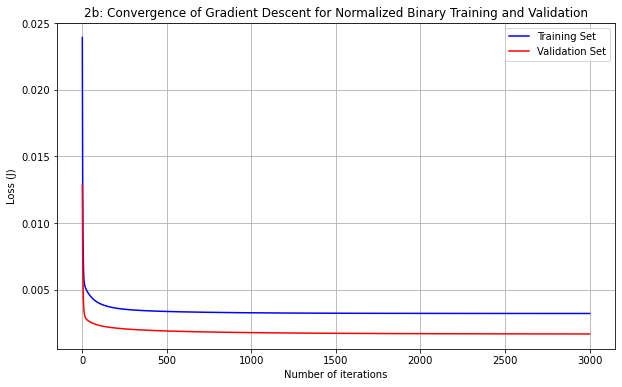

In [626]:
plt.plot(range(1, iterations + 1), lossHistory2b, color = 'blue', label = 'Training Set')
plt.plot(range(1, iterations + 1), lossHistoryV2b, color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('2b: Convergence of Gradient Descent for Normalized Binary Training and Validation') 
plt.legend()